In [1]:
A=[1,2]
B=[3,5]

In [5]:
import torch
torch.cat(A,B)

ModuleNotFoundError: No module named 'torch'

In [1]:
pip install torch

  Using cached torch-2.2.0-cp39-cp39-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/410.6 MB 6.3 kB/s eta 17:33:41
ERROR: Exception:
Traceback (most recent call last):
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vend

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 kB/s eta 0:00:00m eta 0:00:010:00:09m
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio

  Using cached torch-2.2.0-cp39-cp39-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/410.6 MB 4.8 kB/s eta 22:52:17
ERROR: Exception:
Traceback (most recent call last):
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/home/mary/anaconda3/lib/python3.9/site-packages/pip/_vend

Note: you may need to restart the kernel to use updated packages.


In [1]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os

In [2]:
MV=pd.read_csv('MV.csv')

In [3]:
#TotalMV
s=MV['Stkcd']
SecuCode=[]
for i in s:
    SecuCode.append(str(i).zfill(6))
TotalMV=pd.DataFrame({'SecuCode':SecuCode,'TradingDay':np.array(MV['Trddt']),'TotalMV':np.array(MV['Dsmvtll'])})

In [4]:
#股票收益率,A股市场收益率用上证指数000001
df_vwap_ret=pd.read_csv('df_vwap_ret.csv',index_col=0)
s=df_vwap_ret['SecuCode']
SecuCode=[]
for i in s:
    SecuCode.append(str(i).zfill(6))
df_vwap_ret['SecuCode']=SecuCode

In [5]:
BMO=pd.read_csv("BM.csv")

In [6]:
BMOA=BMO[BMO['StateTypeCode']=='A']

In [7]:
#账面市值比
BM=pd.DataFrame({'SecuCode':np.array(BMOA['Symbol']),'EndDate':np.array(BMOA['EndDate']),'BM':np.array(BMOA['NetAssetToMarketValueA'])})

In [8]:
s=BM['SecuCode']
SecuCode=[]
for i in s:
    SecuCode.append(str(i).zfill(6))
BM=pd.DataFrame({'SecuCode':SecuCode,'EndDate':np.array(BM['EndDate']),'BM':np.array(BM['BM'])})

In [9]:
SecuCode=BM['SecuCode'].unique()#填充
BMF=pd.DataFrame(columns=['SecuCode','TradingDay','BM'])
for Secu in SecuCode:
    BM_Secu=BM[BM['SecuCode']==Secu].reset_index(drop=True)#从原表提取的
    BM_Secu_temp=pd.DataFrame(columns=['SecuCode','TradingDay','BM'])#每个股票的
    for j in range(len(BM_Secu)):
        if j>0:
            Start_Date=BM_Secu['EndDate'][j-1]
            End_Date=BM_Secu['EndDate'][j]
            TradingDay=pd.date_range(Start_Date,End_Date)#每只股票每个季度的
            BMF_Secu=pd.DataFrame({'SecuCode':[Secu]*(len(TradingDay)),'TradingDay':TradingDay,'BM':list(BM_Secu[BM_Secu['EndDate']==End_Date]['BM'])*(len(TradingDay))})
            BM_Secu_temp=pd.concat([BM_Secu_temp,BMF_Secu],ignore_index=True)
        else:
            End_Date=BM_Secu['EndDate'][j]
            TradingDay=pd.date_range(end=End_Date,periods=93)
            BMF_Secu=pd.DataFrame({'SecuCode':[Secu]*(len(TradingDay)),'TradingDay':TradingDay,'BM':list(BM_Secu[BM_Secu['EndDate']==End_Date]['BM'])*(len(TradingDay))})
            BM_Secu_temp=pd.concat([BM_Secu_temp,BMF_Secu],ignore_index=True)
    BM_Secu_temp=BM_Secu_temp.drop_duplicates(['TradingDay'],keep='last').reset_index(drop=True)
    BMF=pd.concat([BMF,BM_Secu_temp],ignore_index=True)

In [11]:
from datetime import datetime
import time

In [12]:
TradingDay=[]
for day in BMF['TradingDay']:
    TradingDay.append(datetime.strptime(str(day),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
BMF=pd.DataFrame({'SecuCode':np.array(BMF['SecuCode']),'TradingDay':TradingDay,'BM':np.array(BMF['BM'])})

In [13]:
BMF_test=BMF[BMF['SecuCode']<'800000']

In [14]:
TotalMV_test=TotalMV[TotalMV['SecuCode']<'800000']

In [15]:
#合并列表
ComFrame=pd.merge(BMF_test,TotalMV_test,on=['SecuCode','TradingDay'])

In [16]:
ComFrame_all=pd.merge(ComFrame,df_vwap_ret,on=['SecuCode','TradingDay'])

In [17]:
#分成六部分
factor_list=pd.DataFrame(columns=['TradingDay','SH','SM','SL','BH','BM','BL'])
for day in ComFrame_all['TradingDay'].unique():
    #按照市值进行排序
    Com_day=ComFrame_all[ComFrame_all['TradingDay']==day]
    Com_day_sorted_MV=Com_day.sort_values(by=['TotalMV'],ascending=True,ignore_index=True)
    SMV=Com_day_sorted_MV.iloc[:int(len(Com_day_sorted_MV)/2)]#小市值股票
    BMV=Com_day_sorted_MV.iloc[int(len(Com_day_sorted_MV)/2):]#大市值股票
    #按照BM进行排序
    Com_day_sorted_BM=Com_day.sort_values(by=['BM'],ascending=True,ignore_index=True)
    LBM=Com_day_sorted_BM.iloc[:int(len(Com_day_sorted_BM)*0.3)]
    MBM=Com_day_sorted_BM.iloc[int(len(Com_day_sorted_BM)*0.3):int(len(Com_day_sorted_BM)*0.7)]
    HBM=Com_day_sorted_BM.iloc[int(len(Com_day_sorted_BM)*0.7):]
    #取交集得出6组
    SH=pd.merge(SMV,HBM,on=['SecuCode'])
    SM=pd.merge(SMV,MBM,on=['SecuCode'])
    SL=pd.merge(SMV,LBM,on=['SecuCode'])
    BH=pd.merge(BMV,HBM,on=['SecuCode'])
    BM=pd.merge(BMV,MBM,on=['SecuCode'])
    BL=pd.merge(BMV,LBM,on=['SecuCode'])
    sh=(sum(SH['TotalMV_x']*SH['day_yield_x']))/sum(SH['TotalMV_x'])
    sm=(sum(SM['TotalMV_x']*SM['day_yield_x']))/sum(SM['TotalMV_x'])
    sl=(sum(SL['TotalMV_x']*SL['day_yield_x']))/sum(SL['TotalMV_x'])
    bh=(sum(BH['TotalMV_x']*BH['day_yield_x']))/sum(BH['TotalMV_x'])
    bm=(sum(BM['TotalMV_x']*BM['day_yield_x']))/sum(BM['TotalMV_x'])
    bl=(sum(BL['TotalMV_x']*BL['day_yield_x']))/sum(BL['TotalMV_x'])
    factor_day=pd.DataFrame({'TradingDay':[day],'SH':[sh],'SM':[sm],'SL':[sl],'BH':[bh],'BM':[bm],'BL':[bl]})
    factor_list=pd.concat([factor_list,factor_day],ignore_index=True)

In [75]:
factor_list

,TradingDay,SH,SM,SL,BH,BM,BL
0,2020-01-02,0.018273,0.013488,0.012271,0.014650,0.014429,0.024507
1,2020-01-03,0.008797,0.004450,0.003437,-0.002224,0.005348,0.001076
2,2020-01-06,0.002420,0.007516,0.003231,-0.003234,0.005812,-0.001208
3,2020-01-07,0.014027,0.012774,0.007826,0.003923,0.008569,0.007849
4,2020-01-08,-0.000429,0.000155,-0.001928,0.002155,-0.000388,-0.001237
...,...,...,...,...,...,...,...
723,2022-12-26,0.000553,0.005074,0.004934,-0.003490,0.016459,0.016564
724,2022-12-27,0.021670,0.005780,-0.005139,0.008380,0.006159,0.009814
725,2022-12-28,0.002885,-0.001501,-0.006003,-0.004481,-0.008904,-0.004920
726,2022-12-29,-0.011631,-0.008981,-0.001777,-0.011768,-0.009106,-0.000321


In [28]:
#无风险
Risk_free_rate=pd.read_csv('fivefactor_daily.csv')

In [65]:
Risk_free_rate

,trddy,mkt_rf,smb,hml,umd,rmw,cma,rf,smb_equal,hml_equal,umd_equal,rmw_equal,cma_equal
0,1994-01-04,-0.003950,0.000329,0.003827,0.010374,-0.004755,-0.014706,0.000285,0.002883,0.005370,0.008679,-0.007093,-0.019481
1,1994-01-05,0.007166,0.011850,0.012679,0.009254,-0.020330,-0.006645,0.000285,0.011780,0.013751,0.012208,-0.017225,-0.000045
2,1994-01-06,0.028537,0.012046,0.005722,-0.000346,-0.002358,0.008642,0.000285,0.008664,0.001760,-0.004893,-0.004767,-0.000838
3,1994-01-07,-0.004087,0.009666,0.005175,-0.027683,0.003846,0.004410,0.000285,0.011543,0.007985,-0.028359,0.000227,0.001732
4,1994-01-10,0.002382,0.010774,0.018843,-0.000999,-0.031611,-0.031871,0.000285,0.009054,0.014788,0.001511,-0.025590,-0.010480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,2023-02-27,-0.003975,-0.005703,0.000176,0.010986,0.004958,-0.004342,0.000041,-0.002983,0.001963,0.006765,0.003494,-0.001875
7086,2023-02-28,0.007110,0.003561,0.002943,-0.002723,-0.005623,0.004424,0.000041,0.002083,0.002515,-0.001980,-0.004015,0.004212
7087,2023-03-01,0.009707,-0.000745,0.000642,-0.001333,-0.001422,0.005082,0.000041,0.002067,-0.001275,-0.004298,-0.001624,0.003429
7088,2023-03-02,-0.002286,-0.002190,0.009061,0.003263,-0.003070,0.007247,0.000041,0.000004,0.006202,-0.003090,-0.001311,0.004214


In [30]:
Risk_free_rate_test=Risk_free_rate[Risk_free_rate['trddy']>='2020-01-01']
mkt_rf=pd.DataFrame({'TradingDay':np.array(Risk_free_rate_test['trddy']),'mkt_rf':np.array(Risk_free_rate_test['mkt_rf'])})

In [22]:
factor_list['SMB']=1/3*(factor_list['SH']+factor_list['SM']+factor_list['SL'])-1/3*(factor_list['BH']+factor_list['BM']+factor_list['BL'])
factor_list['HML']=1/2*(factor_list['SH']+factor_list['SL'])-1/2*(factor_list['BH']+factor_list['BL'])

In [38]:
#Add Rm Rf
factor_list=pd.merge(factor_list,mkt_rf,on='TradingDay')

In [39]:
factor_list

,TradingDay,SH,SM,SL,BH,BM,BL,SMB,HML,mkt_rf
0,2020-01-02,0.018273,0.013488,0.012271,0.014650,0.014429,0.024507,-0.003185,-0.004307,0.014510
1,2020-01-03,0.008797,0.004450,0.003437,-0.002224,0.005348,0.001076,0.004161,0.006691,0.000255
2,2020-01-06,0.002420,0.007516,0.003231,-0.003234,0.005812,-0.001208,0.003932,0.005046,0.004016
3,2020-01-07,0.014027,0.012774,0.007826,0.003923,0.008569,0.007849,0.004762,0.005041,0.009652
4,2020-01-08,-0.000429,0.000155,-0.001928,0.002155,-0.000388,-0.001237,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.000553,0.005074,0.004934,-0.003490,0.016459,0.016564,-0.006324,-0.003794,0.009960
724,2022-12-27,0.021670,0.005780,-0.005139,0.008380,0.006159,0.009814,-0.000680,-0.000831,0.008151
725,2022-12-28,0.002885,-0.001501,-0.006003,-0.004481,-0.008904,-0.004920,0.004562,0.003142,-0.006859
726,2022-12-29,-0.011631,-0.008981,-0.001777,-0.011768,-0.009106,-0.000321,-0.000398,-0.000660,-0.004049


In [40]:
factor_fama=pd.DataFrame({'TradingDay':np.array(factor_list['TradingDay']),'SMB':np.array(factor_list['SMB']),'HML':np.array(factor_list['HML']),'Rm-Rf':np.array(factor_list['mkt_rf'])})

In [41]:
factor_fama

,TradingDay,SMB,HML,Rm-Rf
0,2020-01-02,-0.003185,-0.004307,0.014510
1,2020-01-03,0.004161,0.006691,0.000255
2,2020-01-06,0.003932,0.005046,0.004016
3,2020-01-07,0.004762,0.005041,0.009652
4,2020-01-08,-0.000910,-0.001637,-0.009873
...,...,...,...,...
723,2022-12-26,-0.006324,-0.003794,0.009960
724,2022-12-27,-0.000680,-0.000831,0.008151
725,2022-12-28,0.004562,0.003142,-0.006859
726,2022-12-29,-0.000398,-0.000660,-0.004049


In [43]:
Y

,TradingDay,P11,P12,P13,P14,P15,P21,P22,P23,P24,...,P41,P42,P43,P44,P45,P51,P52,P53,P54,P55
0,2020-01-02,0.011306,0.010047,0.006757,0.015383,0.008560,0.011230,0.011991,0.016839,0.015877,...,0.025943,0.024570,0.013437,0.020134,0.019690,0.025679,-0.000626,0.027355,0.013892,0.014087
1,2020-01-03,0.021975,0.003654,0.009318,0.008279,0.010459,-0.004315,0.007486,0.010373,0.007447,...,0.004694,0.010722,0.013600,0.017404,-0.002253,-0.001265,0.004378,0.005614,0.007212,-0.008437
2,2020-01-06,0.024747,-0.002464,0.018000,0.000491,-0.005503,-0.015812,0.007449,0.020290,0.005053,...,0.001231,0.019403,0.006354,-0.003610,-0.008649,-0.004329,0.008973,0.003380,0.005503,-0.005867
3,2020-01-07,0.016653,0.010926,0.009004,0.015084,0.009624,-0.000599,0.010769,0.030716,0.016830,...,0.007447,0.001210,0.010072,-0.006630,0.033284,0.009168,0.004957,0.016734,0.003627,0.000384
4,2020-01-08,-0.007245,-0.003084,-0.008059,-0.010271,-0.007338,0.007314,0.002082,0.027436,-0.005788,...,0.001597,-0.005910,0.008006,0.005852,-0.020720,-0.004394,0.004599,0.007620,0.022758,-0.009460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.006255,0.010216,0.005912,-0.003749,-0.005428,0.005031,0.010328,0.009466,0.008904,...,0.008706,0.026747,0.012471,-0.002697,-0.001612,0.026654,0.003394,0.025393,0.011135,-0.005012
724,2022-12-27,0.003981,-0.017163,0.006460,0.032009,0.068267,0.006731,-0.012731,0.003424,0.006222,...,0.002457,0.010411,0.012636,0.009322,0.018566,0.012209,0.003877,0.007007,0.004296,0.008231
725,2022-12-28,-0.003701,-0.021809,-0.004272,-0.007070,NaN,0.010435,0.002949,-0.007054,-0.003525,...,-0.008212,-0.003531,-0.018393,-0.010249,-0.003310,-0.005221,-0.008004,0.000598,-0.013389,-0.001415
726,2022-12-29,0.010165,-0.002693,-0.007737,-0.013178,NaN,-0.008652,-0.001186,-0.012144,-0.013364,...,0.006248,-0.004479,-0.008859,-0.008766,-0.012666,0.003048,-0.002232,-0.016103,-0.012407,-0.011635


In [44]:
A=pd.merge(Y,factor_fama,on='TradingDay')

In [47]:
A

,TradingDay,P11,P12,P13,P14,P15,P21,P22,P23,P24,...,P44,P45,P51,P52,P53,P54,P55,SMB,HML,Rm-Rf
0,2020-01-02,0.011306,0.010047,0.006757,0.015383,0.008560,0.011230,0.011991,0.016839,0.015877,...,0.020134,0.019690,0.025679,-0.000626,0.027355,0.013892,0.014087,-0.003185,-0.004307,0.014510
1,2020-01-03,0.021975,0.003654,0.009318,0.008279,0.010459,-0.004315,0.007486,0.010373,0.007447,...,0.017404,-0.002253,-0.001265,0.004378,0.005614,0.007212,-0.008437,0.004161,0.006691,0.000255
2,2020-01-06,0.024747,-0.002464,0.018000,0.000491,-0.005503,-0.015812,0.007449,0.020290,0.005053,...,-0.003610,-0.008649,-0.004329,0.008973,0.003380,0.005503,-0.005867,0.003932,0.005046,0.004016
3,2020-01-07,0.016653,0.010926,0.009004,0.015084,0.009624,-0.000599,0.010769,0.030716,0.016830,...,-0.006630,0.033284,0.009168,0.004957,0.016734,0.003627,0.000384,0.004762,0.005041,0.009652
4,2020-01-08,-0.007245,-0.003084,-0.008059,-0.010271,-0.007338,0.007314,0.002082,0.027436,-0.005788,...,0.005852,-0.020720,-0.004394,0.004599,0.007620,0.022758,-0.009460,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.006255,0.010216,0.005912,-0.003749,-0.005428,0.005031,0.010328,0.009466,0.008904,...,-0.002697,-0.001612,0.026654,0.003394,0.025393,0.011135,-0.005012,-0.006324,-0.003794,0.009960
724,2022-12-27,0.003981,-0.017163,0.006460,0.032009,0.068267,0.006731,-0.012731,0.003424,0.006222,...,0.009322,0.018566,0.012209,0.003877,0.007007,0.004296,0.008231,-0.000680,-0.000831,0.008151
725,2022-12-28,-0.003701,-0.021809,-0.004272,-0.007070,NaN,0.010435,0.002949,-0.007054,-0.003525,...,-0.010249,-0.003310,-0.005221,-0.008004,0.000598,-0.013389,-0.001415,0.004562,0.003142,-0.006859
726,2022-12-29,0.010165,-0.002693,-0.007737,-0.013178,NaN,-0.008652,-0.001186,-0.012144,-0.013364,...,-0.008766,-0.012666,0.003048,-0.002232,-0.016103,-0.012407,-0.011635,-0.000398,-0.000660,-0.004049


In [45]:
tt=pd.DataFrame({'R':np.array(A.iloc[2:]['P11']),'F1':np.array(A.iloc[:-2]['SMB']),'F2':np.array(A.iloc[:-2]['HML'])})

In [46]:
tt.corr()#RankIC

,R,F1,F2
R,1.000000,0.072631,0.048686
F1,0.072631,1.000000,0.924698
F2,0.048686,0.924698,1.000000


In [159]:
factor_list

,TradingDay,SH,SM,SL,BH,BM,BL,SMB,HML,mkt_rf
0,2020-01-02,0.018273,0.013488,0.012271,0.014650,0.014429,0.024507,-0.003185,-0.004307,0.014510
1,2020-01-03,0.008797,0.004450,0.003437,-0.002224,0.005348,0.001076,0.004161,0.006691,0.000255
2,2020-01-06,0.002420,0.007516,0.003231,-0.003234,0.005812,-0.001208,0.003932,0.005046,0.004016
3,2020-01-07,0.014027,0.012774,0.007826,0.003923,0.008569,0.007849,0.004762,0.005041,0.009652
4,2020-01-08,-0.000429,0.000155,-0.001928,0.002155,-0.000388,-0.001237,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.000553,0.005074,0.004934,-0.003490,0.016459,0.016564,-0.006324,-0.003794,0.009960
724,2022-12-27,0.021670,0.005780,-0.005139,0.008380,0.006159,0.009814,-0.000680,-0.000831,0.008151
725,2022-12-28,0.002885,-0.001501,-0.006003,-0.004481,-0.008904,-0.004920,0.004562,0.003142,-0.006859
726,2022-12-29,-0.011631,-0.008981,-0.001777,-0.011768,-0.009106,-0.000321,-0.000398,-0.000660,-0.004049


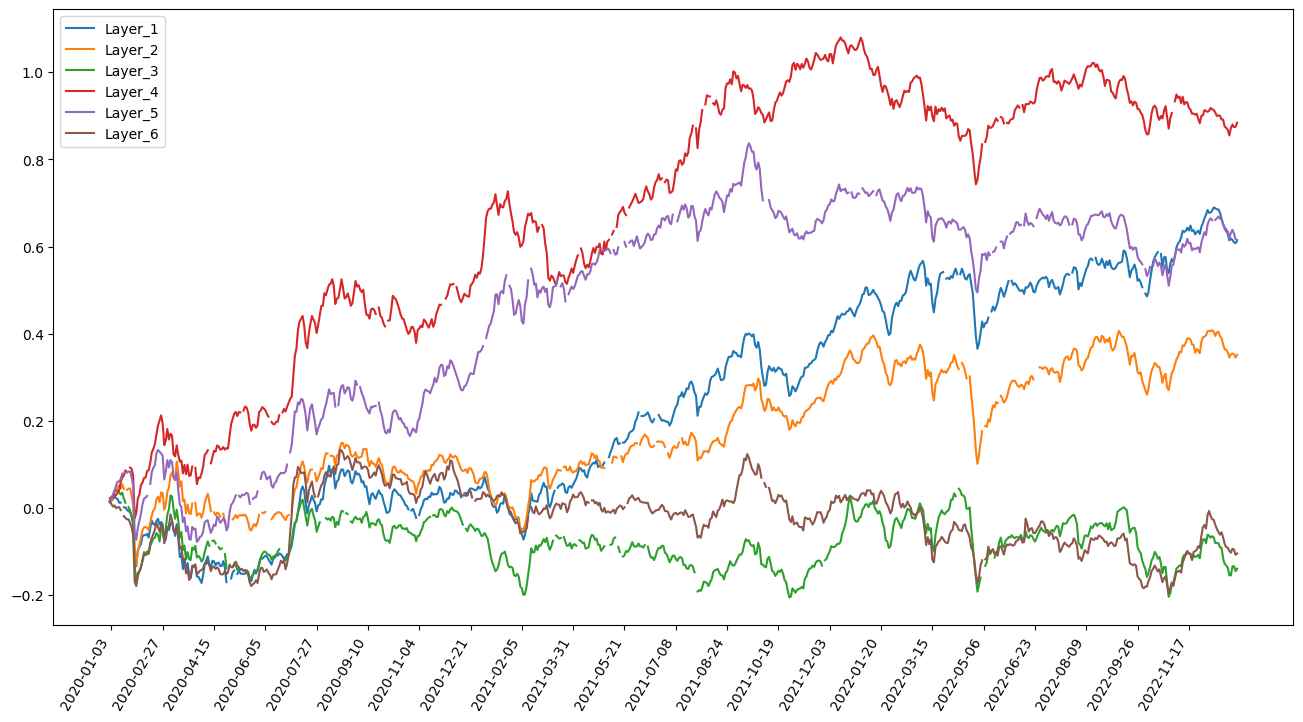

In [26]:
#layer of six groups
cwd_path = os.getcwd()
file_path = cwd_path + '/' + 'layer'
if not os.path.exists(file_path):
    os.makedirs(file_path)#创建多层目录
fig_name = 'Layer' 
fig, ax = plt.subplots(figsize=(16, 8))

L1 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SH']), label='Layer_1')
L2 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SM']), label='Layer_2')
L3 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SL']), label='Layer_3')
L4 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BH']), label='Layer_4')
L5 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BM']), label='Layer_5')
L6 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BL']), label='Layer_6')
plt.legend(loc='best')
plt.tick_params(labelsize=10)
x_count = len(factor_list['TradingDay'])
plt.xticks(range(1, x_count, int(x_count / 22)), rotation=60, ha='right')
plt.savefig(file_path +'/'+ fig_name + '.png', bbox_inches='tight')

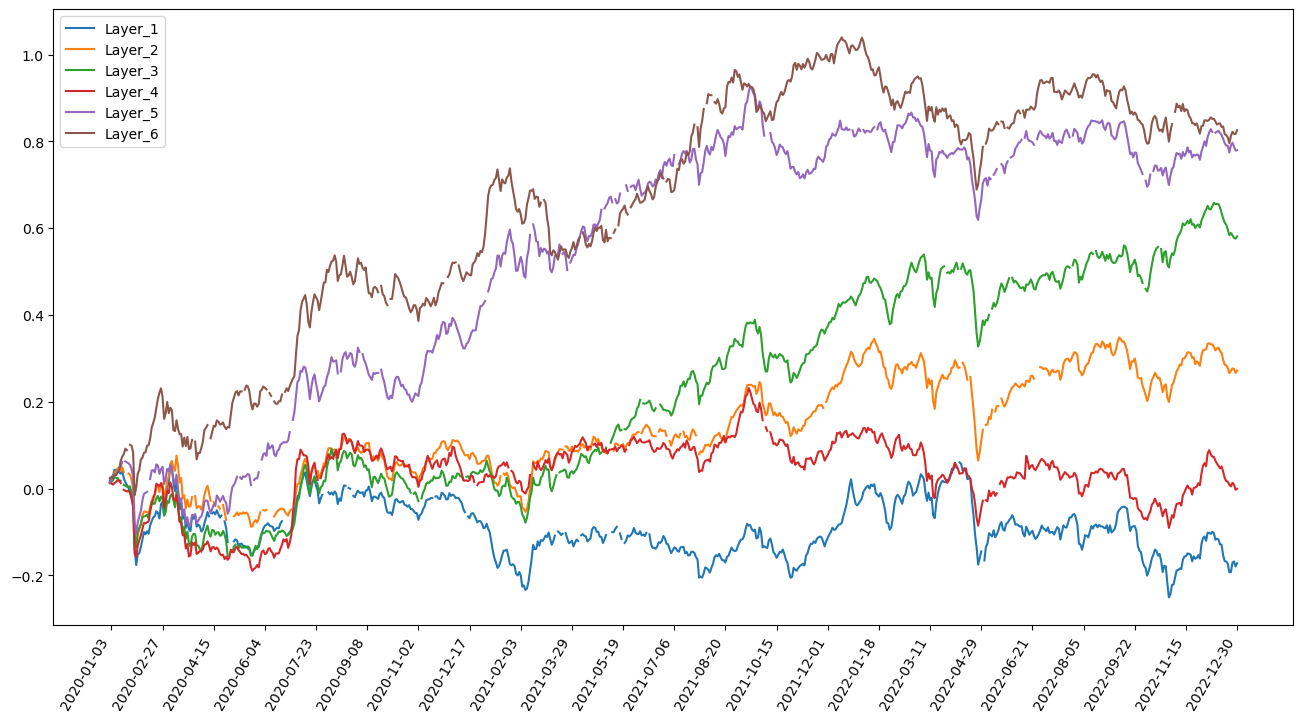

In [62]:
cwd_path = os.getcwd()
file_path = cwd_path + '/' + 'layer1'
if not os.path.exists(file_path):
    os.makedirs(file_path)#创建多层目录
fig_name = 'Layer' 
fig, ax = plt.subplots(figsize=(16, 8))

L1 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SH']), label='Layer_1')
L2 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SM']), label='Layer_2')
L3 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['SL']), label='Layer_3')
L4 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BH']), label='Layer_4')
L5 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BM']), label='Layer_5')
L6 = plt.plot(factor_list['TradingDay'], np.cumsum(factor_list['BL']), label='Layer_6')

plt.legend(loc='best')
plt.tick_params(labelsize=10)
x_count = len(factor_list['TradingDay'])
plt.xticks(range(1, x_count, int(x_count / 22)), rotation=60, ha='right')
plt.savefig(file_path +'/'+ fig_name + '.png', bbox_inches='tight')

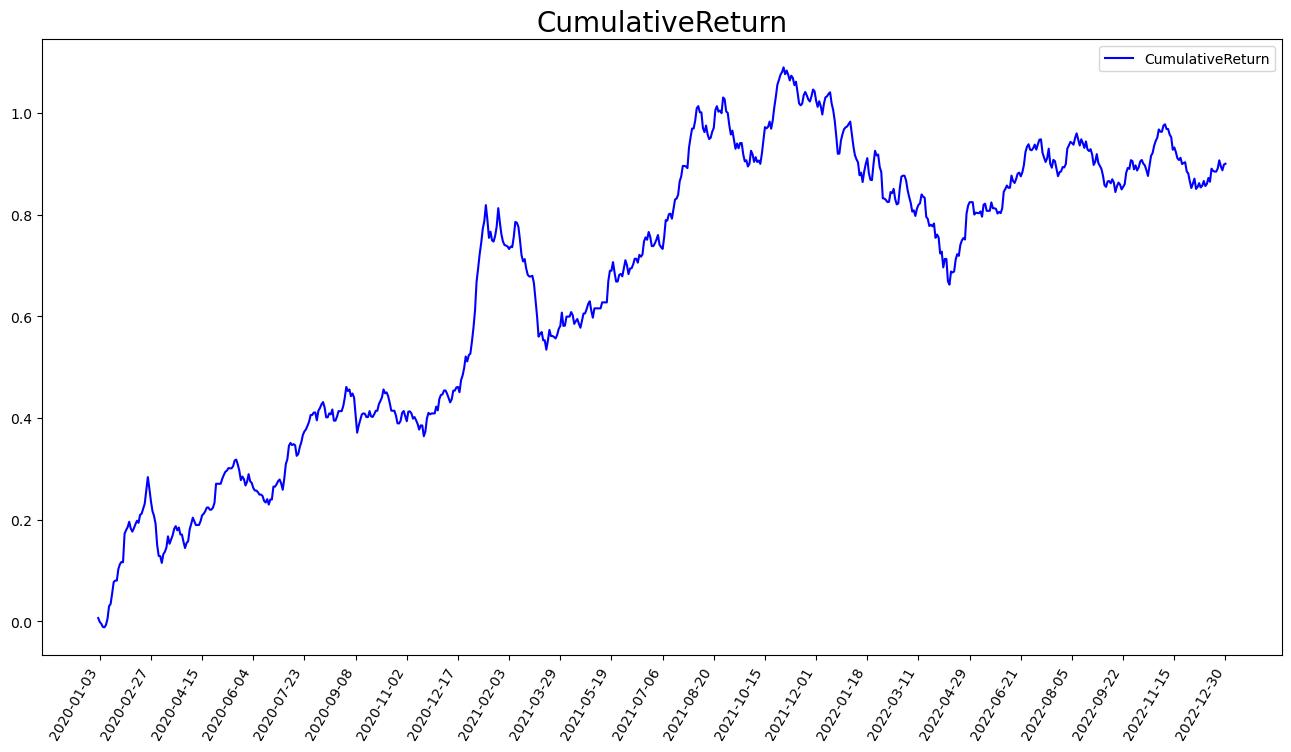

In [66]:
#累计收益率
fig_name = 'CumulativeReturn'
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title(fig_name, fontsize=20)

portfolio=[(factor_list['BL'][i]-factor_list['SH'][i]) for i in range(len(factor_list['BL']))]
plt.plot(factor_list['TradingDay'], np.nancumsum(portfolio),color='b',label='CumulativeReturn')
plt.legend(loc='best')

plt.tick_params(labelsize=10)
x_count = len(factor_list['TradingDay'])
plt.xticks(range(1, x_count, int(x_count / 22)), rotation=60, ha='right')
plt.savefig(file_path+'/'+ fig_name + '.png', bbox_inches='tight')

In [42]:
# P1=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P2=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P3=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P4=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P5=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P6=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P7=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P8=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P9=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P10=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P11=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P12=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P13=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P14=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P15=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P16=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P17=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P18=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P19=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P20=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P21=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P22=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P23=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P24=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
# P25=pd.DataFrame(columns=['SecuCode' ,'TradingDay','BM','TotalMV','day_yield'])
Y=pd.DataFrame(columns=['TradingDay','P11','P12','P13','P14','P15','P21','P22','P23','P24','P25','P31','P32','P33','P34','P35','P41','P42','P43','P44','P45','P51','P52','P53','P54','P55'])
for day in ComFrame_all['TradingDay'].unique():
    #按照市值进行排序
    Com_day=ComFrame_all[ComFrame_all['TradingDay']==day]
    Com_day_sorted_MV=Com_day.sort_values(by=['TotalMV'],ascending=True,ignore_index=True)
    MV1=Com_day_sorted_MV.iloc[:int(len(Com_day_sorted_MV)/5)]
    MV2=Com_day_sorted_MV.iloc[int(len(Com_day_sorted_MV)/5):int(2*len(Com_day_sorted_MV)/5)]
    MV3=Com_day_sorted_MV.iloc[int(2*len(Com_day_sorted_MV)/5):int(3*len(Com_day_sorted_MV)/5)]
    MV4=Com_day_sorted_MV.iloc[int(3*len(Com_day_sorted_MV)/5):int(4*len(Com_day_sorted_MV)/5)]
    MV5=Com_day_sorted_MV.iloc[int(4*len(Com_day_sorted_MV)/5):]
    #BM分五类
    Com_day_sorted_BM=Com_day.sort_values(by=['BM'],ascending=True,ignore_index=True)
    BM1=Com_day_sorted_BM.iloc[:int(len(Com_day_sorted_BM)/5)]
    BM2=Com_day_sorted_BM.iloc[int(len(Com_day_sorted_BM)/5):int(2*len(Com_day_sorted_BM)/5)]
    BM3=Com_day_sorted_BM.iloc[int(2*len(Com_day_sorted_BM)/5):int(3*len(Com_day_sorted_BM)/5)]
    BM4=Com_day_sorted_BM.iloc[int(3*len(Com_day_sorted_BM)/5):int(4*len(Com_day_sorted_BM)/5)]
    BM5=Com_day_sorted_BM.iloc[int(4*len(Com_day_sorted_BM)/5):]
    #25个组合
    P11=pd.merge(MV1,BM1,on='SecuCode')
    P12=pd.merge(MV1,BM2,on='SecuCode')
    P13=pd.merge(MV1,BM3,on='SecuCode')
    P14=pd.merge(MV1,BM4,on='SecuCode')
    P15=pd.merge(MV1,BM5,on='SecuCode')
    P21=pd.merge(MV2,BM1,on='SecuCode')
    P22=pd.merge(MV2,BM2,on='SecuCode')
    P23=pd.merge(MV2,BM3,on='SecuCode')
    P24=pd.merge(MV2,BM4,on='SecuCode')
    P25=pd.merge(MV2,BM5,on='SecuCode')
    P31=pd.merge(MV3,BM1,on='SecuCode')
    P32=pd.merge(MV3,BM2,on='SecuCode')
    P33=pd.merge(MV3,BM3,on='SecuCode')
    P34=pd.merge(MV3,BM4,on='SecuCode')
    P35=pd.merge(MV3,BM5,on='SecuCode')
    P41=pd.merge(MV4,BM1,on='SecuCode')
    P42=pd.merge(MV4,BM2,on='SecuCode')
    P43=pd.merge(MV4,BM3,on='SecuCode')
    P44=pd.merge(MV4,BM4,on='SecuCode')
    P45=pd.merge(MV4,BM5,on='SecuCode')
    P51=pd.merge(MV5,BM1,on='SecuCode')
    P52=pd.merge(MV5,BM2,on='SecuCode')
    P53=pd.merge(MV5,BM3,on='SecuCode')
    P54=pd.merge(MV5,BM4,on='SecuCode')
    P55=pd.merge(MV5,BM5,on='SecuCode')
    r11=[(sum(P11['TotalMV_x']*P11['day_yield_x']))/sum(P11['TotalMV_x']) if len(P11)>0 else np.nan]
    r12=[(sum(P12['TotalMV_x']*P12['day_yield_x']))/sum(P12['TotalMV_x']) if len(P12)>0 else np.nan]
    r13=[(sum(P13['TotalMV_x']*P13['day_yield_x']))/sum(P13['TotalMV_x']) if len(P13)>0 else np.nan]
    r14=[(sum(P14['TotalMV_x']*P14['day_yield_x']))/sum(P14['TotalMV_x']) if len(P14)>0 else np.nan]
    r15=[(sum(P15['TotalMV_x']*P15['day_yield_x']))/sum(P15['TotalMV_x']) if len(P15)>0 else np.nan]
    r21=[(sum(P21['TotalMV_x']*P21['day_yield_x']))/sum(P21['TotalMV_x']) if len(P21)>0 else np.nan]
    r22=[(sum(P22['TotalMV_x']*P22['day_yield_x']))/sum(P22['TotalMV_x']) if len(P22)>0 else np.nan]
    r23=[(sum(P23['TotalMV_x']*P23['day_yield_x']))/sum(P23['TotalMV_x']) if len(P23)>0 else np.nan]
    r24=[(sum(P24['TotalMV_x']*P24['day_yield_x']))/sum(P24['TotalMV_x']) if len(P24)>0 else np.nan]
    r25=[(sum(P25['TotalMV_x']*P25['day_yield_x']))/sum(P25['TotalMV_x']) if len(P25)>0 else np.nan]
    r31=[(sum(P31['TotalMV_x']*P31['day_yield_x']))/sum(P31['TotalMV_x']) if len(P31)>0 else np.nan]
    r32=[(sum(P32['TotalMV_x']*P32['day_yield_x']))/sum(P32['TotalMV_x']) if len(P32)>0 else np.nan]
    r33=[(sum(P33['TotalMV_x']*P33['day_yield_x']))/sum(P33['TotalMV_x']) if len(P33)>0 else np.nan]
    r34=[(sum(P34['TotalMV_x']*P34['day_yield_x']))/sum(P34['TotalMV_x']) if len(P34)>0 else np.nan]
    r35=[(sum(P35['TotalMV_x']*P35['day_yield_x']))/sum(P35['TotalMV_x']) if len(P35)>0 else np.nan]
    r41=[(sum(P41['TotalMV_x']*P41['day_yield_x']))/sum(P41['TotalMV_x']) if len(P41)>0 else np.nan]
    r42=[(sum(P42['TotalMV_x']*P42['day_yield_x']))/sum(P42['TotalMV_x']) if len(P42)>0 else np.nan]
    r43=[(sum(P43['TotalMV_x']*P43['day_yield_x']))/sum(P43['TotalMV_x']) if len(P43)>0 else np.nan]
    r44=[(sum(P44['TotalMV_x']*P44['day_yield_x']))/sum(P44['TotalMV_x']) if len(P44)>0 else np.nan]
    r45=[(sum(P45['TotalMV_x']*P45['day_yield_x']))/sum(P45['TotalMV_x']) if len(P45)>0 else np.nan]
    r51=[(sum(P51['TotalMV_x']*P51['day_yield_x']))/sum(P51['TotalMV_x']) if len(P51)>0 else np.nan]
    r52=[(sum(P52['TotalMV_x']*P52['day_yield_x']))/sum(P52['TotalMV_x']) if len(P52)>0 else np.nan]
    r53=[(sum(P53['TotalMV_x']*P53['day_yield_x']))/sum(P53['TotalMV_x']) if len(P53)>0 else np.nan]
    r54=[(sum(P54['TotalMV_x']*P54['day_yield_x']))/sum(P54['TotalMV_x']) if len(P54)>0 else np.nan]
    r55=[(sum(P55['TotalMV_x']*P55['day_yield_x']))/sum(P55['TotalMV_x']) if len(P55)>0 else np.nan] 
    r_day=pd.DataFrame({'TradingDay':[day],'P11':r11,'P12':r12,'P13':r13,'P14':r14,'P15':r15,'P21':r21,'P22':r22,'P23':r23,'P24':r24,'P25':r25,'P31':r31,'P32':r32,'P33':r33,'P34':r34,'P35':r35,'P41':r41,'P42':r42,'P43':r43,'P44':r44,'P45':r45,'P51':r51,'P52':r52,'P53':r53,'P54':r54,'P55':r55})
    Y=pd.concat([Y,r_day],ignore_index=True)

In [254]:
Risk_free_rate

,trddy,mkt_rf,smb,hml,umd,rmw,cma,rf,smb_equal,hml_equal,umd_equal,rmw_equal,cma_equal
0,1994-01-04,-0.003950,0.000329,0.003827,0.010374,-0.004755,-0.014706,0.000285,0.002883,0.005370,0.008679,-0.007093,-0.019481
1,1994-01-05,0.007166,0.011850,0.012679,0.009254,-0.020330,-0.006645,0.000285,0.011780,0.013751,0.012208,-0.017225,-0.000045
2,1994-01-06,0.028537,0.012046,0.005722,-0.000346,-0.002358,0.008642,0.000285,0.008664,0.001760,-0.004893,-0.004767,-0.000838
3,1994-01-07,-0.004087,0.009666,0.005175,-0.027683,0.003846,0.004410,0.000285,0.011543,0.007985,-0.028359,0.000227,0.001732
4,1994-01-10,0.002382,0.010774,0.018843,-0.000999,-0.031611,-0.031871,0.000285,0.009054,0.014788,0.001511,-0.025590,-0.010480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,2023-02-27,-0.003975,-0.005703,0.000176,0.010986,0.004958,-0.004342,0.000041,-0.002983,0.001963,0.006765,0.003494,-0.001875
7086,2023-02-28,0.007110,0.003561,0.002943,-0.002723,-0.005623,0.004424,0.000041,0.002083,0.002515,-0.001980,-0.004015,0.004212
7087,2023-03-01,0.009707,-0.000745,0.000642,-0.001333,-0.001422,0.005082,0.000041,0.002067,-0.001275,-0.004298,-0.001624,0.003429
7088,2023-03-02,-0.002286,-0.002190,0.009061,0.003263,-0.003070,0.007247,0.000041,0.000004,0.006202,-0.003090,-0.001311,0.004214


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [48]:
A

,TradingDay,P11,P12,P13,P14,P15,P21,P22,P23,P24,...,P44,P45,P51,P52,P53,P54,P55,SMB,HML,Rm-Rf
0,2020-01-02,0.011306,0.010047,0.006757,0.015383,0.008560,0.011230,0.011991,0.016839,0.015877,...,0.020134,0.019690,0.025679,-0.000626,0.027355,0.013892,0.014087,-0.003185,-0.004307,0.014510
1,2020-01-03,0.021975,0.003654,0.009318,0.008279,0.010459,-0.004315,0.007486,0.010373,0.007447,...,0.017404,-0.002253,-0.001265,0.004378,0.005614,0.007212,-0.008437,0.004161,0.006691,0.000255
2,2020-01-06,0.024747,-0.002464,0.018000,0.000491,-0.005503,-0.015812,0.007449,0.020290,0.005053,...,-0.003610,-0.008649,-0.004329,0.008973,0.003380,0.005503,-0.005867,0.003932,0.005046,0.004016
3,2020-01-07,0.016653,0.010926,0.009004,0.015084,0.009624,-0.000599,0.010769,0.030716,0.016830,...,-0.006630,0.033284,0.009168,0.004957,0.016734,0.003627,0.000384,0.004762,0.005041,0.009652
4,2020-01-08,-0.007245,-0.003084,-0.008059,-0.010271,-0.007338,0.007314,0.002082,0.027436,-0.005788,...,0.005852,-0.020720,-0.004394,0.004599,0.007620,0.022758,-0.009460,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.006255,0.010216,0.005912,-0.003749,-0.005428,0.005031,0.010328,0.009466,0.008904,...,-0.002697,-0.001612,0.026654,0.003394,0.025393,0.011135,-0.005012,-0.006324,-0.003794,0.009960
724,2022-12-27,0.003981,-0.017163,0.006460,0.032009,0.068267,0.006731,-0.012731,0.003424,0.006222,...,0.009322,0.018566,0.012209,0.003877,0.007007,0.004296,0.008231,-0.000680,-0.000831,0.008151
725,2022-12-28,-0.003701,-0.021809,-0.004272,-0.007070,NaN,0.010435,0.002949,-0.007054,-0.003525,...,-0.010249,-0.003310,-0.005221,-0.008004,0.000598,-0.013389,-0.001415,0.004562,0.003142,-0.006859
726,2022-12-29,0.010165,-0.002693,-0.007737,-0.013178,NaN,-0.008652,-0.001186,-0.012144,-0.013364,...,-0.008766,-0.012666,0.003048,-0.002232,-0.016103,-0.012407,-0.011635,-0.000398,-0.000660,-0.004049


In [49]:
list_test=pd.DataFrame({'TradingDay':np.array(A.iloc[2:]['TradingDay']),'Y':np.array(A.iloc[2:]['P53']),'SMB':np.array(A.iloc[:-2]['SMB']),'HML':np.array(A.iloc[:-2]['HML']),'Rm':np.array(A.iloc[:-2]['Rm-Rf'])})

In [50]:
list_test

,TradingDay,Y,SMB,HML,Rm
0,2020-01-06,0.003380,-0.003185,-0.004307,0.014510
1,2020-01-07,0.016734,0.004161,0.006691,0.000255
2,2020-01-08,0.007620,0.003932,0.005046,0.004016
3,2020-01-09,0.002912,0.004762,0.005041,0.009652
4,2020-01-10,-0.001435,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...
721,2022-12-26,0.025393,-0.005331,-0.005047,-0.006116
722,2022-12-27,0.007007,-0.002548,-0.005843,-0.002537
723,2022-12-28,0.000598,-0.006324,-0.003794,0.009960
724,2022-12-29,-0.016103,-0.000680,-0.000831,0.008151


In [55]:
from statsmodels.formula.api import ols
                      # 小写的 ols 函数才会自带截距项，OLS 则不会
         # 固定格式：因变量 ~ 自变量(+ 号连接)
lm = ols('Y ~ SMB+HML', data=list_test).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03660
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.964
Time:                        21:56:30   Log-Likelihood:                 1504.3
No. Observations:                 594   AIC:                            -3003.
Df Residuals:                     591   BIC:                            -2989.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.797      0.426      -0.001       0.002
SMB            0.0211      0.263      0.080      0.936      -0.496       0.538
HML           -0.0418      0.242     -0.173      0.863      -0.517       0.434
==============================================================================
Omnibus:                       45.720   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.995
Skew:                          -0.209   Prob(JB):                     6.07e-39
Kurtosis:                       5.634   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

52

In [256]:
Risk_free_rate_test

,trddy,mkt_rf,smb,hml,umd,rmw,cma,rf,smb_equal,hml_equal,umd_equal,rmw_equal,cma_equal
6323,2020-01-02,0.014510,0.005617,0.002060,-0.002190,-0.006972,0.007840,0.000041,0.000683,-0.003368,0.005641,-0.000718,0.002026
6324,2020-01-03,0.000255,0.008086,0.005325,-0.010899,-0.009039,0.012189,0.000041,0.002808,0.000856,-0.001672,-0.005809,0.004498
6325,2020-01-06,0.004016,0.004886,0.001692,-0.007907,-0.005465,0.004647,0.000041,0.000121,0.000124,-0.001045,-0.003005,0.001591
6326,2020-01-07,0.009652,0.006386,-0.004478,0.004598,-0.004564,-0.000076,0.000041,0.001539,-0.000647,0.000302,0.000011,0.000685
6327,2020-01-08,-0.009873,-0.002484,0.000885,-0.001134,0.003767,-0.000833,0.000041,0.000437,-0.000028,-0.002176,0.001685,-0.000292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,2023-02-27,-0.003975,-0.005703,0.000176,0.010986,0.004958,-0.004342,0.000041,-0.002983,0.001963,0.006765,0.003494,-0.001875
7086,2023-02-28,0.007110,0.003561,0.002943,-0.002723,-0.005623,0.004424,0.000041,0.002083,0.002515,-0.001980,-0.004015,0.004212
7087,2023-03-01,0.009707,-0.000745,0.000642,-0.001333,-0.001422,0.005082,0.000041,0.002067,-0.001275,-0.004298,-0.001624,0.003429
7088,2023-03-02,-0.002286,-0.002190,0.009061,0.003263,-0.003070,0.007247,0.000041,0.000004,0.006202,-0.003090,-0.001311,0.004214


In [56]:
load=pd.DataFrame({'TradingDay':np.array(Risk_free_rate_test['trddy']),'mkt_rf':np.array(Risk_free_rate_test['mkt_rf']),'smb':np.array(Risk_free_rate_test['smb']),'hml':np.array(Risk_free_rate_test['hml']),'rmw':np.array(Risk_free_rate_test['rmw']),'cma':np.array(Risk_free_rate_test['cma'])})

In [57]:
test=pd.merge(list_test,load,on='TradingDay')

In [58]:
test

,TradingDay,Y,SMB,HML,Rm,mkt_rf,smb,hml,rmw,cma
0,2020-01-06,0.003380,-0.003185,-0.004307,0.014510,0.004016,0.004886,0.001692,-0.005465,0.004647
1,2020-01-07,0.016734,0.004161,0.006691,0.000255,0.009652,0.006386,-0.004478,-0.004564,-0.000076
2,2020-01-08,0.007620,0.003932,0.005046,0.004016,-0.009873,-0.002484,0.000885,0.003767,-0.000833
3,2020-01-09,0.002912,0.004762,0.005041,0.009652,0.013378,0.003495,-0.009296,0.004913,-0.009684
4,2020-01-10,-0.001435,-0.000910,-0.001637,-0.009873,-0.001662,-0.001356,-0.007460,0.006284,-0.006727
...,...,...,...,...,...,...,...,...,...,...
721,2022-12-26,0.025393,-0.005331,-0.005047,-0.006116,0.009960,0.007210,-0.009700,-0.004687,-0.003001
722,2022-12-27,0.007007,-0.002548,-0.005843,-0.002537,0.008151,-0.006084,0.001631,0.005013,-0.007252
723,2022-12-28,0.000598,-0.006324,-0.003794,0.009960,-0.006859,-0.007175,0.002804,0.006322,0.002421
724,2022-12-29,-0.016103,-0.000680,-0.000831,0.008151,-0.004049,-0.000588,-0.007806,0.001826,-0.005415


In [59]:
test.corr()

,Y,SMB,HML,Rm,mkt_rf,smb,hml,rmw,cma
Y,1.000000,-0.008564,-0.026610,0.008213,0.418964,-0.020707,-0.023975,-0.034307,-0.019966
SMB,-0.008564,1.000000,0.924698,-0.240314,-0.054688,0.067252,0.073274,-0.035840,0.068413
HML,-0.026610,0.924698,1.000000,-0.221852,-0.071383,0.050300,0.066606,-0.013505,0.053514
Rm,0.008213,-0.240314,-0.221852,1.000000,0.005154,0.041516,0.036255,-0.040932,0.057951
mkt_rf,0.418964,-0.054688,-0.071383,0.005154,1.000000,-0.064567,-0.267932,0.052001,-0.219838
smb,-0.020707,0.067252,0.050300,0.041516,-0.064567,1.000000,0.225728,-0.783645,0.642592
hml,-0.023975,0.073274,0.066606,0.036255,-0.267932,0.225728,1.000000,-0.501084,0.767575
rmw,-0.034307,-0.035840,-0.013505,-0.040932,0.052001,-0.783645,-0.501084,1.000000,-0.834910
cma,-0.019966,0.068413,0.053514,0.057951,-0.219838,0.642592,0.767575,-0.834910,1.000000


In [61]:
lm1 = ols('Y ~ mkt_rf+smb', data=test).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     76.03
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.16e-30
Time:                        21:57:02   Log-Likelihood:                 1885.4
No. Observations:                 717   AIC:                            -3765.
Df Residuals:                     714   BIC:                            -3751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.001      1.279      0.201      -0.000       0.002
mkt_rf         0.6301      0.051     12.316      0.000       0.530       0.730
smb            0.0162      0.079      0.205      0.837      -0.139       0.172
==============================================================================
Omnibus:                       38.923   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.049
Skew:                           0.209   Prob(JB):                     3.45e-24
Kurtosis:                       4.855   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
ESG=pd.read_excel('2009_2022.xlsx',header=None)

In [114]:
ESG_test=pd.DataFrame({'SecuCode':ESG[0],'Year':ESG[3],'Score':ESG[4]})

In [115]:
ESG_test=ESG_test.iloc[2:]

In [116]:
ESG_test=ESG_test[ESG_test['Year']>=2019].reset_index(drop=True)

In [117]:
s=ESG_test['SecuCode']

In [118]:
ESG_test

,SecuCode,Year,Score
0,000001.SZ,2019,82.22
1,000002.SZ,2019,85.66
2,000004.SZ,2019,61.07
3,000005.SZ,2019,67.95
4,000006.SZ,2019,82.77
...,...,...,...
17077,872925.BJ,2022,74.009
17078,873122.BJ,2022,67.734
17079,873169.BJ,2022,71.959
17080,873223.BJ,2022,71.681


In [119]:
SecuCode=[]
for i in s:
    Secu=i[:6]
    SecuCode.append(Secu)

In [120]:
ESG_temp=pd.DataFrame({'SecuCode':SecuCode,'Year':np.array(ESG_test['Year']),'Score':np.array(ESG_test['Score'])})

In [121]:
ESG_factor=ESG_temp[ESG_temp['SecuCode']<'800000']

In [122]:
ESG_factor['rank']=ESG_factor.groupby('Year',axis=0)['Score'].rank(ascending=False)

/tmp/ipykernel_4503/721660204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESG_factor['rank']=ESG_factor.groupby('Year',axis=0)['Score'].rank(ascending=False)


In [136]:
ESG_f=pd.DataFrame(columns=['TradingDay','SecuCode','rank'])
SecuCode=ESG_factor['SecuCode'].unique()
for Secu in SecuCode:
    Secu_frame=ESG_factor[ESG_factor['SecuCode']==Secu]
    ESG_to_daily=pd.DataFrame(columns=['TradingDay','SecuCode','rank'])
    for i in range(len(Secu_frame)):
        TD=[]
        if Secu_frame.iloc[i]['Year']==2019:
            TradingDay=pd.date_range(start='2020-01-01',end='2020-12-31')
            for day in TradingDay:
                TD.append(datetime.strptime(str(day),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
        elif Secu_frame.iloc[i]['Year']==2020:
            TradingDay=pd.date_range(start='2021-01-01',end='2021-12-31')
            for day in TradingDay:
                TD.append(datetime.strptime(str(day),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
        elif Secu_frame.iloc[i]['Year']==2021:
            TradingDay=pd.date_range(start='2022-01-01',end='2022-12-31')
            for day in TradingDay:
                TD.append(datetime.strptime(str(day),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
        ESG_Secu_i=pd.DataFrame({'TradingDay':TD,'SecuCode':[Secu]*len(TD),'rank':[Secu_frame.iloc[i]['rank']]*len(TD)})
        ESG_to_daily=pd.concat([ESG_to_daily,ESG_Secu_i],ignore_index=True)
    ESG_f=pd.concat([ESG_f,ESG_to_daily],ignore_index=True)

In [137]:
ESG_f

,TradingDay,SecuCode,rank
0,2020-01-01,000001,197.5
1,2020-01-02,000001,197.5
2,2020-01-03,000001,197.5
3,2020-01-04,000001,197.5
4,2020-01-05,000001,197.5
...,...,...,...
4422306,2022-12-27,688819,1978.0
4422307,2022-12-28,688819,1978.0
4422308,2022-12-29,688819,1978.0
4422309,2022-12-30,688819,1978.0


In [139]:
ComFrame_all=pd.merge(ComFrame_all,ESG_f,on=['SecuCode','TradingDay'])

In [142]:
factor_list_ESG=pd.DataFrame(columns=['TradingDay','ABC','ABc','AbC','Abc','aBC','aBc','abC','abc'])
for day in ComFrame_all['TradingDay'].unique():
    #按照市值进行排序
    Com_day=ComFrame_all[ComFrame_all['TradingDay']==day]
    Com_day_sorted_MV=Com_day.sort_values(by=['TotalMV'],ascending=True,ignore_index=True)
    SMV=Com_day_sorted_MV.iloc[:int(len(Com_day_sorted_MV)/2)]#小市值股票
    BMV=Com_day_sorted_MV.iloc[int(len(Com_day_sorted_MV)/2):]#大市值股票
    #按照BM进行排序
    Com_day_sorted_BM=Com_day.sort_values(by=['BM'],ascending=True,ignore_index=True)
    LBM=Com_day_sorted_BM.iloc[:int(len(Com_day_sorted_BM)/2)]
    HBM=Com_day_sorted_BM.iloc[int(len(Com_day_sorted_BM)/2):]
    #按照ESG
    Com_day_sorted_ESG=Com_day.sort_values(by=['rank'],ascending=True,ignore_index=True)
    LES=Com_day_sorted_ESG.iloc[:int(len(Com_day_sorted_ESG)/2)]
    HES=Com_day_sorted_ESG.iloc[int(len(Com_day_sorted_ESG)/2):]
    #取交集得出6组
    ABC=pd.merge(SMV,LBM,on=['SecuCode'])
    ABC=pd.merge(ABC,LES,on=['SecuCode'])
    ABc=pd.merge(SMV,LBM,on=['SecuCode'])
    ABc=pd.merge(ABc,HES,on=['SecuCode'])
    AbC=pd.merge(SMV,HBM,on=['SecuCode'])
    AbC=pd.merge(AbC,LES,on=['SecuCode'])
    Abc=pd.merge(SMV,HBM,on=['SecuCode'])
    Abc=pd.merge(Abc,HES,on=['SecuCode'])
    aBC=pd.merge(BMV,LBM,on=['SecuCode'])
    aBC=pd.merge(aBC,LES,on=['SecuCode'])
    aBc=pd.merge(BMV,LBM,on=['SecuCode'])
    aBc=pd.merge(aBc,HES,on=['SecuCode'])
    abC=pd.merge(BMV,HBM,on=['SecuCode'])
    abC=pd.merge(abC,LES,on=['SecuCode'])
    abc=pd.merge(BMV,HBM,on=['SecuCode'])
    abc=pd.merge(abc,HES,on=['SecuCode'])
    A1=(sum(ABC['TotalMV_x']*ABC['day_yield_x']))/sum(ABC['TotalMV_x'])
    A2=(sum(ABc['TotalMV_x']*ABc['day_yield_x']))/sum(ABc['TotalMV_x'])
    A3=(sum(AbC['TotalMV_x']*AbC['day_yield_x']))/sum(AbC['TotalMV_x'])
    A4=(sum(Abc['TotalMV_x']*Abc['day_yield_x']))/sum(Abc['TotalMV_x'])
    A5=(sum(aBC['TotalMV_x']*aBC['day_yield_x']))/sum(aBC['TotalMV_x'])
    A6=(sum(aBc['TotalMV_x']*aBc['day_yield_x']))/sum(aBc['TotalMV_x'])
    A7=(sum(abC['TotalMV_x']*abC['day_yield_x']))/sum(abC['TotalMV_x'])
    A8=(sum(abc['TotalMV_x']*abc['day_yield_x']))/sum(abc['TotalMV_x'])
    factor_day=pd.DataFrame({'TradingDay':[day],'ABC':[A1],'ABc':[A2],'AbC':[A3],'Abc':[A4],'aBC':[A5],'aBc':[A6],'abC':[A7],'abc':[A8]})
    factor_list_ESG=pd.concat([factor_list_ESG,factor_day],ignore_index=True)

In [143]:
factor_list_ESG

,TradingDay,ABC,ABc,AbC,Abc,aBC,aBc,abC,abc
0,2020-01-02,0.008818,0.014505,0.019690,0.012055,0.020329,0.024111,0.014587,0.014706
1,2020-01-03,0.001465,0.006118,0.003597,0.005332,0.001903,0.004001,-0.002588,0.004398
2,2020-01-06,0.002856,0.005297,0.003745,0.008403,-0.001259,0.002718,-0.002514,0.002657
3,2020-01-07,0.016654,0.007197,0.007469,0.016974,0.010716,0.003220,0.004190,0.005627
4,2020-01-08,0.001468,-0.000550,-0.006319,-0.000588,-0.000819,-0.002213,0.003614,-0.005012
...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.006099,0.006941,-0.000297,0.001434,0.019980,0.014503,-0.001411,0.007344
724,2022-12-27,-0.004799,-0.000874,0.020834,0.012239,0.008415,0.006191,0.009643,0.005411
725,2022-12-28,0.003036,-0.005158,0.010812,-0.008725,-0.004388,-0.011243,-0.003889,-0.009015
726,2022-12-29,0.000311,-0.005560,-0.014942,-0.008710,-0.002462,0.000797,-0.012298,-0.012725


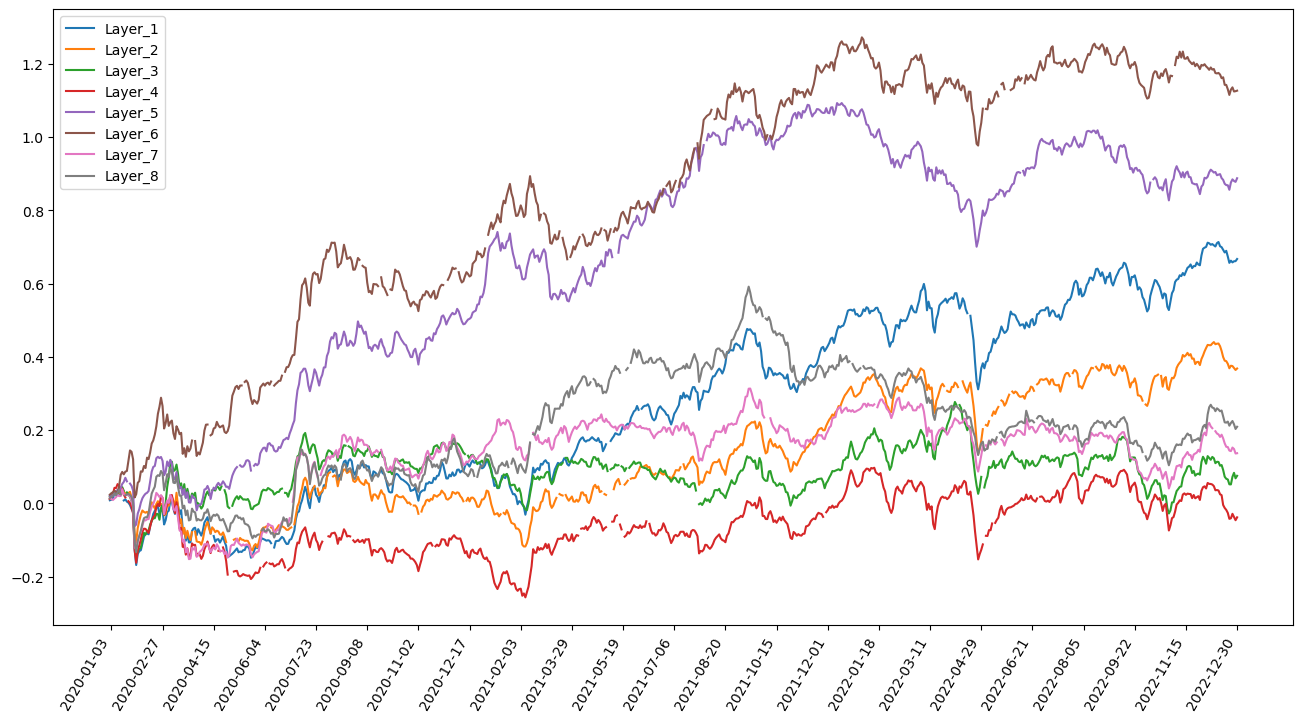

In [145]:
cwd_path = os.getcwd()
file_path = cwd_path + '/' + 'layer_ESG'
if not os.path.exists(file_path):
    os.makedirs(file_path)#创建多层目录
fig_name = 'Layer' 
fig, ax = plt.subplots(figsize=(16, 8))

L1 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['ABC']), label='Layer_1')
L2 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['ABc']), label='Layer_2')
L3 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['AbC']), label='Layer_3')
L4 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['Abc']), label='Layer_4')
L5 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['aBC']), label='Layer_5')
L6 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['aBc']), label='Layer_6')
L5 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['abC']), label='Layer_7')
L6 = plt.plot(factor_list_ESG['TradingDay'], np.cumsum(factor_list_ESG['abc']), label='Layer_8')

plt.legend(loc='best')
plt.tick_params(labelsize=10)
x_count = len(factor_list['TradingDay'])
plt.xticks(range(1, x_count, int(x_count / 22)), rotation=60, ha='right')
plt.savefig(file_path +'/'+ fig_name + '.png', bbox_inches='tight')

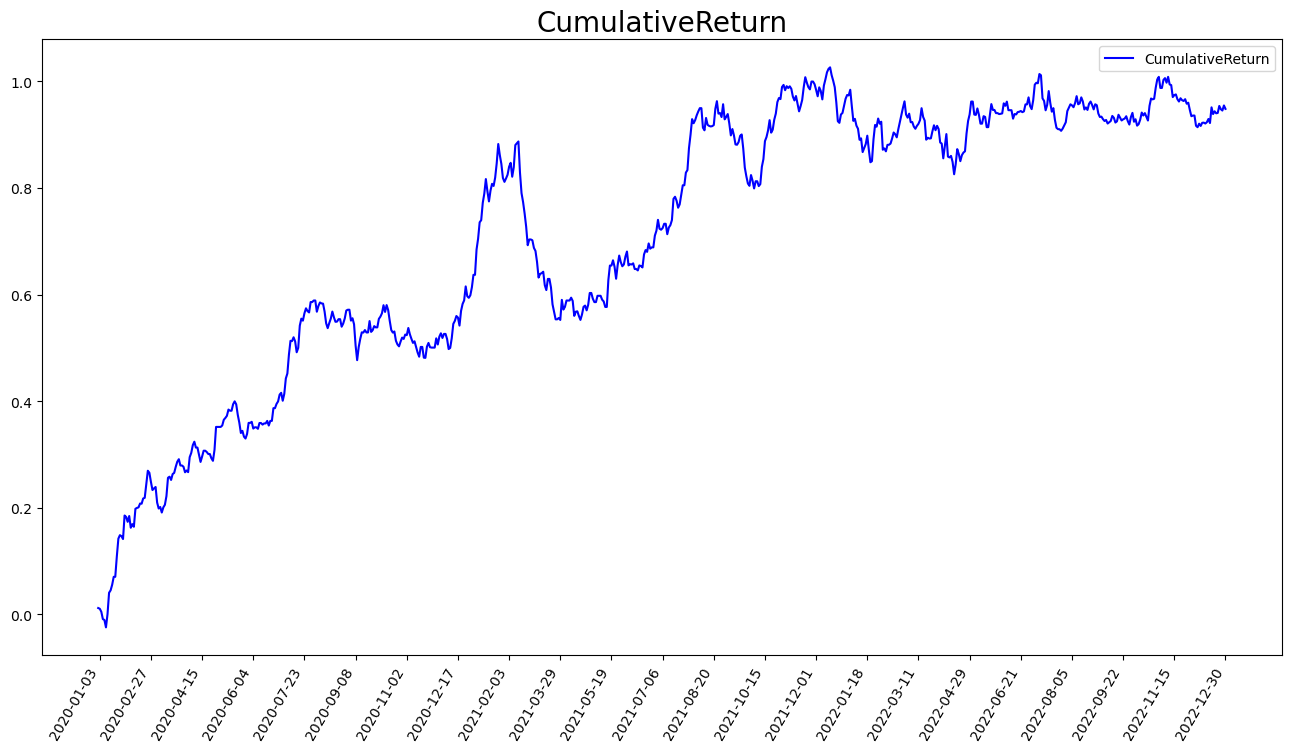

In [146]:
#累计收益率
fig_name = 'CumulativeReturn'
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title(fig_name, fontsize=20)

portfolio=[(factor_list_ESG['aBc'][i]-factor_list_ESG['Abc'][i]) for i in range(len(factor_list_ESG['Abc']))]
plt.plot(factor_list_ESG['TradingDay'], np.nancumsum(portfolio),color='b',label='CumulativeReturn')
plt.legend(loc='best')

plt.tick_params(labelsize=10)
x_count = len(factor_list_ESG['TradingDay'])
plt.xticks(range(1, x_count, int(x_count / 22)), rotation=60, ha='right')
plt.savefig(file_path+'/'+ fig_name + '.png', bbox_inches='tight')

In [161]:
import math 
mean=np.nansum(portfolio)/len(portfolio)
std_list=[(i-mean)**2 for i in portfolio]
std=math.sqrt(np.nansum(std_list)/len(std_list))

In [170]:
#无ESG
np.nanstd(portfolio)

0.01472078301675295

In [171]:
#无ESG的收益率均值
np.nanmean(portfolio)

0.0013257132103213335

In [164]:
portfolio=[(factor_list_ESG['aBc'][i]-factor_list_ESG['Abc'][i]) for i in range(len(factor_list_ESG['Abc']))]

In [166]:
#回测收益率的标准差ESG
np.nanmean(portfolio)

0.0014007527184682735

In [168]:
#ESG
np.nanstd(portfolio)

0.015308312783784318

In [169]:
portfolio=[(factor_list['BL'][i]-factor_list['SH'][i]) for i in range(len(factor_list['BL']))]

In [111]:
factor_fama

,TradingDay,SMB,HML,Rm-Rf
0,2020-01-02,-0.003185,-0.004307,0.014510
1,2020-01-03,0.004161,0.006691,0.000255
2,2020-01-06,0.003932,0.005046,0.004016
3,2020-01-07,0.004762,0.005041,0.009652
4,2020-01-08,-0.000910,-0.001637,-0.009873
...,...,...,...,...
723,2022-12-26,-0.006324,-0.003794,0.009960
724,2022-12-27,-0.000680,-0.000831,0.008151
725,2022-12-28,0.004562,0.003142,-0.006859
726,2022-12-29,-0.000398,-0.000660,-0.004049


In [134]:
factor_list

,TradingDay,SH,SM,SL,BH,BM,BL,SMB,HML,mkt_rf
0,2020-01-02,0.018273,0.013488,0.012271,0.014650,0.014429,0.024507,-0.003185,-0.004307,0.014510
1,2020-01-03,0.008797,0.004450,0.003437,-0.002224,0.005348,0.001076,0.004161,0.006691,0.000255
2,2020-01-06,0.002420,0.007516,0.003231,-0.003234,0.005812,-0.001208,0.003932,0.005046,0.004016
3,2020-01-07,0.014027,0.012774,0.007826,0.003923,0.008569,0.007849,0.004762,0.005041,0.009652
4,2020-01-08,-0.000429,0.000155,-0.001928,0.002155,-0.000388,-0.001237,-0.000910,-0.001637,-0.009873
...,...,...,...,...,...,...,...,...,...,...
723,2022-12-26,0.000553,0.005074,0.004934,-0.003490,0.016459,0.016564,-0.006324,-0.003794,0.009960
724,2022-12-27,0.021670,0.005780,-0.005139,0.008380,0.006159,0.009814,-0.000680,-0.000831,0.008151
725,2022-12-28,0.002885,-0.001501,-0.006003,-0.004481,-0.008904,-0.004920,0.004562,0.003142,-0.006859
726,2022-12-29,-0.011631,-0.008981,-0.001777,-0.011768,-0.009106,-0.000321,-0.000398,-0.000660,-0.004049
